## Exercise 1: An example partition/decision tree.

## Exercise 2: Why a boosted stump leads to an additive model

The final form of the boosting model (see algorithm 8.12) is

$$\hat{f}(X) = \sum_{b = 1}^B \lambda \hat{f}^b(x)$$

Since the model is a stump ($d=1$), for each $b$ the estimate is a function of a single predcitor, that is $\hat{f}^b(X) = \hat{f}^b(X_j)$ for some $j_b \in \{1, \dots, p\}$. We can then collect terms:

$$
\begin{align}
\hat{f}(X) &= \sum_{b = 1}^B \lambda \hat{f}^b(X_{j_b})\\
&= \sum_{j = 1}^p \lambda \hat{f}_j(X_j)
\end{align}
$$

where $\hat{f}_j(x) = \sum \lambda \hat{f}^b(X_j)$ is a sum over all boosted trees which have $X_j$ as a predictor.

This is the estimate of an additive model.

$$f(X) = \sum_{j=1}^p f_j(X_j)$$

## Exercise 3: Plotting classification error, Gini index, and entropy as functions of $\hat{p}_{m1}$ for the two class case

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def class_error(p_hat_m1):
    p_hat_m2 = 1 - p_hat_m1
    return 1 - p_hat_m2 if p_hat_m2 >= p_hat_m1 else 1 - p_hat_m1

def gini_index(p_hat_m1):
    p_hat_m2 = 1 - p_hat_m1
    return p_hat_m1 * ( 1 - p_hat_m1) + p_hat_m2 * ( 1 - p_hat_m2)

def entropy(p_hat_m1):
    p_hat_m2 = 1 - p_hat_m1
    if p_hat_m1 in {0, 1}:
        return 0
    else:
        return - np.sum(p_hat_m1 * np.log(p_hat_m1) + p_hat_m2 * np.log(p_hat_m2))

v_class_error = np.vectorize(class_error)
v_gini_index = np.vectorize(gini_index)
v_entropy = np.vectorize(entropy, otypes=[np.float])

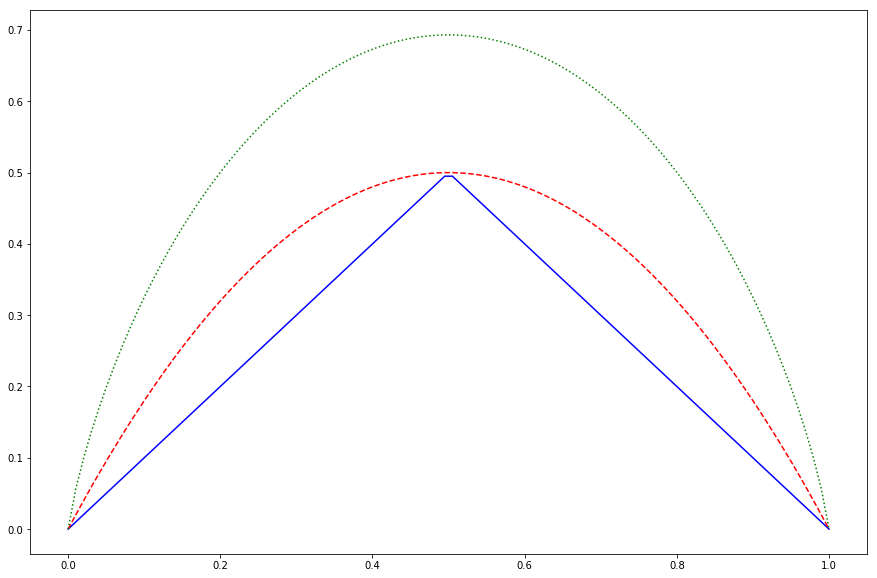

In [14]:
x = np.linspace(0, 1, 100)
y_1, y_2, y_3  = v_class_error(x), v_gini_index(x), v_entropy(x)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y_1, '-b', label="Classification error")
ax.plot(x, y_2, '--r', label="Gini index")
ax.plot(x, y_3, ':g', label="Entropy")


## Exercise 4: Sketching trees and partitions

## Exercise 5: Combining bootstrap classification tree predictions

The 10 boostrap estimates for $P(Red|X)$ are

In [16]:
p_est = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])
p_est

array([0.1 , 0.15, 0.2 , 0.2 , 0.55, 0.6 , 0.6 , 0.65, 0.7 , 0.75])

First we find the classification based on majority vote

In [32]:
# boolean showing if predicted class is red
is_class_red = p_est >= 0.5
# number of times red is predicted
num_red_pred = np.sum(is_class_red)
# predict red if red is the majority vote
if num_red_pred/len(p_est) >= 0.5:
    maj_pred = "Red"
else:
    maj_pred = "Green"

f'majority prediction is {maj_pred}'

'majority prediction is Red'

Next we find the classification based on the average

In [33]:
if np.sum(p_est) >= 0.5:
    avg_pred = "Red"
else:
    avg_pred = "Green"

f'average prediction is {avg_pred}'

'average prediction is Red'

## Exercise 6: A detailed explanation of recursive binary decision tree algorithm for linear regression

See our explanation in the notes for <a href='../../notes.ipynb#Regression-Trees'> § 8.1.1 </a>